# Importing TensorFlow

In [1]:
!nvidia-smi

Fri Jun 21 15:25:08 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8              3W /  100W |      14MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
print(tf.__version__)

2024-06-21 15:25:08.775612: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-21 15:25:08.799871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 15:25:08.799895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 15:25:08.800534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 15:25:08.804814: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data

In [4]:
#!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

In [5]:
SONNETS_FILE = './sonnets.txt'

with open('./sonnets.txt') as f:
    data = f.read()

corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,


In [6]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [7]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [8]:
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15462
maximum length of sequences is: 11


In [9]:
input_sequences = tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")

In [10]:
features = input_sequences[:,:-1]
labels = input_sequences[:,-1]
labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3211)


# Creating and training the model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_words, activation="softmax")
])

2024-06-21 15:25:10.512000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6070 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
2024-06-21 15:25:10.616205: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirection  (None, 300)               301200    
 al)                                                             
                                                                 
 dense (Dense)               (None, 3211)              966511    
                                                                 
Total params: 1588811 (6.06 MB)
Trainable params: 1588811 (6.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


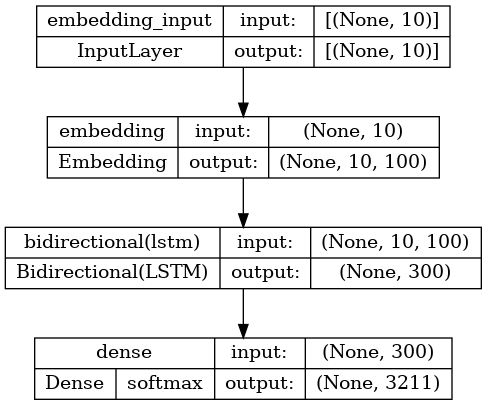

In [14]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [15]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [16]:
history = model.fit(
    x = features,
    y = labels,
    epochs = 50
)

Epoch 1/50


2024-06-21 15:25:12.593241: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-21 15:25:12.664326: I external/local_xla/xla/service/service.cc:168] XLA service 0x725cad842510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-21 15:25:12.664351: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-06-21 15:25:12.668285: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718972712.742515   30377 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


484/484 [==============================] - 7s 11ms/step - loss: 6.8714 - accuracy: 0.0230
Epoch 2/50
484/484 [==============================] - 2s 4ms/step - loss: 6.4257 - accuracy: 0.0318
Epoch 3/50
484/484 [==============================] - 2s 5ms/step - loss: 6.1730 - accuracy: 0.0431
Epoch 4/50
484/484 [==============================] - 2s 4ms/step - loss: 5.8914 - accuracy: 0.0544
Epoch 5/50
484/484 [==============================] - 2s 4ms/step - loss: 5.5887 - accuracy: 0.0629
Epoch 6/50
484/484 [==============================] - 2s 4ms/step - loss: 5.2488 - accuracy: 0.0775
Epoch 7/50
484/484 [==============================] - 2s 4ms/step - loss: 4.8823 - accuracy: 0.0959
Epoch 8/50
484/484 [==============================] - 2s 4ms/step - loss: 4.4962 - accuracy: 0.1237
Epoch 9/50
484/484 [==============================] - 2s 5ms/step - loss: 4.1086 - accuracy: 0.1684
Epoch 10/50
484/484 [==============================] - 2s 4ms/step - loss: 3.7181 - accuracy: 0.2321
Epoch 11/

<Axes: >

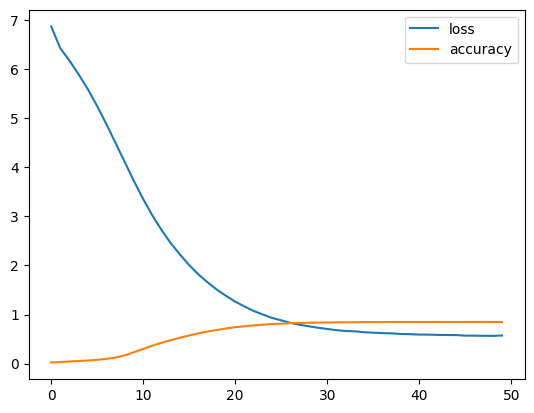

In [17]:
pd.DataFrame(history.history).plot()

# Prediction

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted, axis=-1).item()
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope my eye is pride to show it wrong hate with more rare hath erred in thine one itself ' they do show thee one much great green more more than in my verse ' repair birth to die it bright ' if me love you not doth green my love still truly mine for all doth thee alone ' see mine for you die alone is not grace her eyes are took remain done that lie in thee i have you now see me ' see the praise you well doth catch such so great rage razed rare bright blushing
